In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reading Train Data
train =pd.read_csv(r'D:\AI Bootcamp\Project2\NLP\train_data.csv', delimiter=',')
title_brand =pd.read_csv(r'D:\AI Bootcamp\Project2\NLP\title_brand.csv', delimiter=',')

C:\Users\USER\AppData\Local\Temp\ipykernel_1640\4233518469.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  train =pd.read_csv(r'D:\AI Bootcamp\Project2\NLP\train_data.csv', delimiter=',')


In [3]:
train

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime
0,2,NaN,False,2016-11-11,A2OSUEZJIN7BI,0511189877,NaN,Chris,I have an older URC-WR7 remote and thought thi...,Cannot Learn,1478822400
1,5,NaN,True,2016-06-06,A2NETQRG6JHIG7,0511189877,NaN,Qrysta White,First time I've EVER had a remote that needed ...,zero programming needed! Miracle!?,1465171200
2,4,NaN,True,2016-03-10,A12JHGROAX49G7,0511189877,NaN,Linwood,Got them and only 2 of them worked. company ca...,Works Good and programs easy.,1457568000
3,5,NaN,True,2016-01-14,A1KV65E2TMMG6F,0511189877,NaN,Dane Williams,I got tired of the remote being on the wrong s...,Same as TWC remote,1452729600
4,5,NaN,True,2016-10-20,A280POPEWI0NSA,0594459451,NaN,Kristina H.,After purchasing cheap cords from another webs...,Good Quality Cord,1476921600
...,...,...,...,...,...,...,...,...,...,...,...
838939,5,NaN,True,2017-07-25,A1OOVLE2KZ6KGA,B01HJCN1EI,NaN,Puddzee,These are my favorite charging cords for a few...,Worth the price.,1500940800
838940,1,NaN,True,2017-04-04,A77K1B31UAQ29,B01HJCN1EI,NaN,addictedtoreading,"Update....after 2 months of gentle use, cable ...",UPDATE...BREAKS AND SLOW CHARGING,1491264000
838941,3,NaN,True,2017-07-08,A2SVXUVUAWUDK2,B01HJH42KU,NaN,Andrew,These are okay. The connection becomes very if...,Hope this makes sense. You'd understand if you...,1499472000
838942,5,2.0,True,2016-12-01,A2HUZO7MQAY5I2,B01HJH40WU,NaN,michael clontz,"Ok here is an odd thing that happened to me, I...",Not the correct product as linked in the sale.,1480550400


In [4]:
train.describe()

,overall,unixReviewTime
count,838944.000000,8.389440e+05
mean,4.021317,1.483167e+09
std,1.344223,2.229270e+07
min,1.000000,1.451606e+09
25%,3.000000,1.464653e+09
50%,5.000000,1.479254e+09
75%,5.000000,1.499472e+09
max,5.000000,1.538525e+09


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> 1.توزیع ستون overall</div>


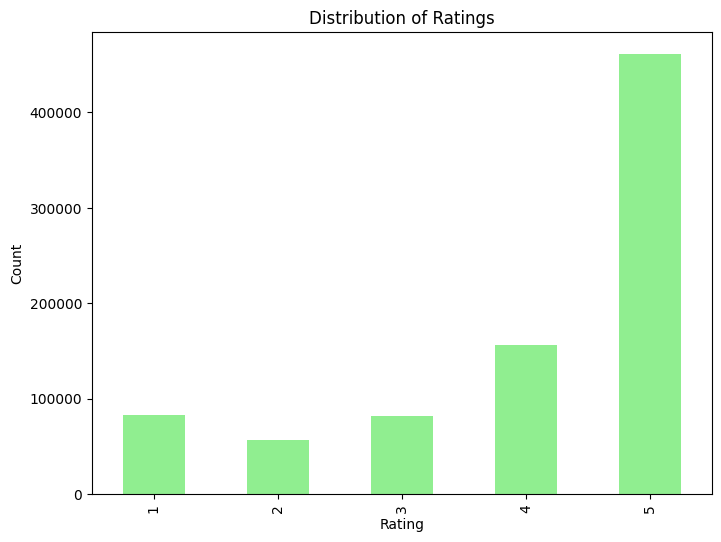

In [5]:
# plotting the distribution of 'overall' ratings
plt.figure(figsize=(8,6))
train['overall'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> از آنجا که توزیع متوازن نیست میتوانیم با استفاده از روش های مختلفی داده را آماده آموزش کنیم</div>


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> 2. رسم ابر کلمات </div>


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


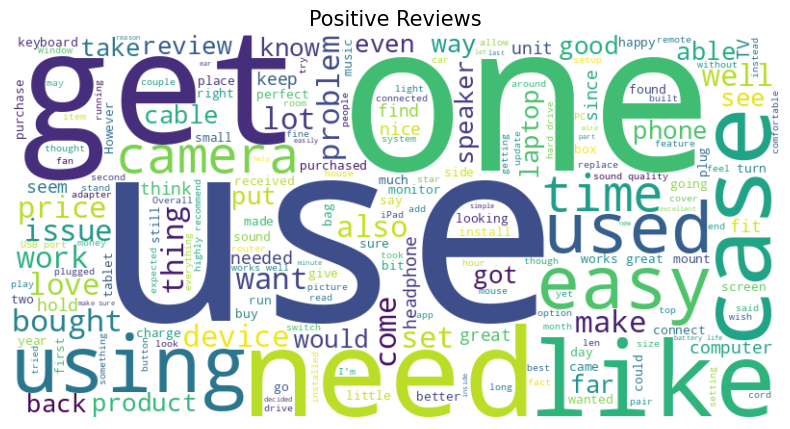

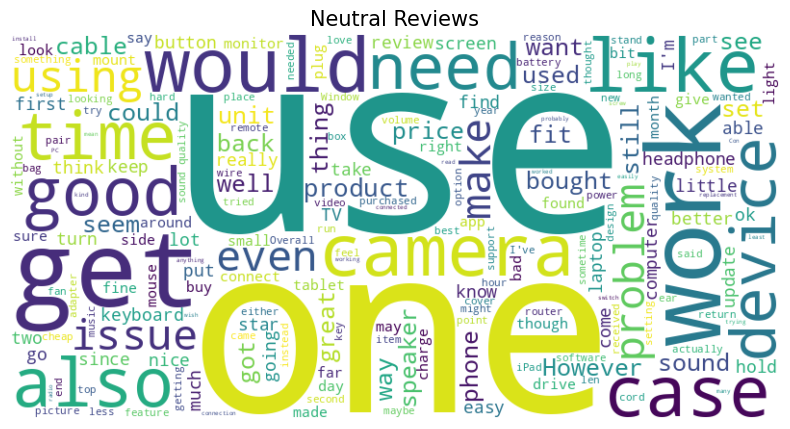

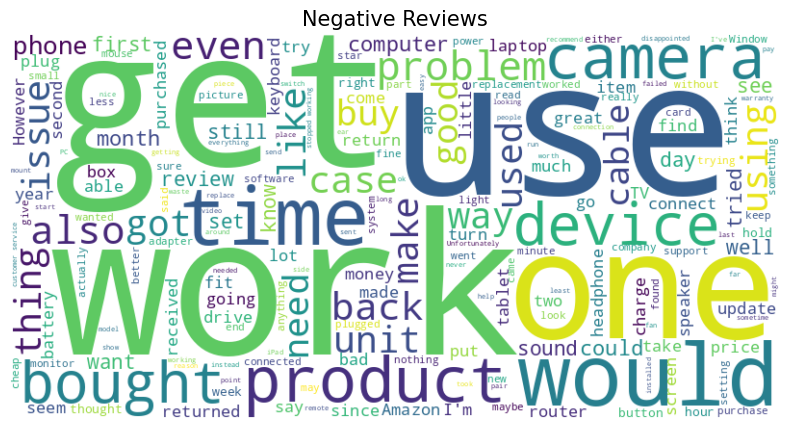

In [6]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

# using nltk 
# data is in english so we define stop words accordingly
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


# this def creates the visulization of word clouds
def create_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white' ,stopwords=stop_words).generate(text)
    wordcloud = WordCloud(
    width=800, 
    height=400, 
    stopwords=stop_words, 
    background_color='white',  
    ).generate(text)



    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=15)
    plt.axis('off')
    plt.show()

# defining positive reviews (rating 4,5)
positive_reviews = ' '.join(train[train['overall'].isin([4, 5])]['reviewText'].dropna())
# defining neutral reviews (rating 3)
neutral_reviews = ' '.join(train[train['overall'] == 3]['reviewText'].dropna())
# defining negative reviews (rating 1,2)
negative_reviews = ' '.join(train[train['overall'].isin([1, 2])]['reviewText'].dropna())

# creating word clouds
create_word_cloud(positive_reviews, 'Positive Reviews')
create_word_cloud(neutral_reviews, 'Neutral Reviews')
create_word_cloud(negative_reviews, 'Negative Reviews')


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff;  padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"><p> یک سری کلمات کاربرد عمومی دارند مثل use یا one .از  طرفی ظاهرا کلمه get در جملات مثبت استفاده کمتری دارد</p><p> کلماتی مثل love,like,easy,.. برخلاف نظرات منفی و خنثی، در نظرات مثبت فراوانی بالایی دارند. بدیهی است که کلمات با مفهوم مثبت در نظرات مثبت، و کلمات با مفهوم منفی در نظرات منفی رایج باشند
</div>


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> 3.نمایش ۱۰ نفری که در مجموع نظرات‌شان بیشتر مفید واقع شده</div>


In [7]:
# converting vote column to numeric values
train['vote'] = train['vote'].str.replace(',', '')
train['vote'] = pd.to_numeric(train['vote'], errors='coerce')

In [8]:
# defining best reviewers based on the votes on thier comments
best_reviewers = train.groupby('reviewerID')['vote'].sum().reset_index()
top10_reviewers = best_reviewers.sort_values(by='vote', ascending=False).head(10)


In [9]:
# resetting index and displayin =g top 10 reviwers
top10_reviewers.reset_index(drop=True, inplace=True)
top10_reviewers

,reviewerID,vote
0,A25GROL6KJV3QG,4345.0
1,A3KJ0DF3LTNJ6X,3096.0
2,A1KPFZCS71QKW5,2978.0
3,AMYCUX8EWEUVV,2605.0
4,ADLVFFE4VBT8,2605.0
5,A2IK776FY6MEMG,2177.0
6,A1GHPJB2N0D0RL,2167.0
7,AW7UMXXJKFSNS,1912.0
8,A2VQ0V1TWXF3U7,1820.0
9,A7HWU6R6UQIX6,1560.0


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> 4.هیستوگرام طول نظرات</div>


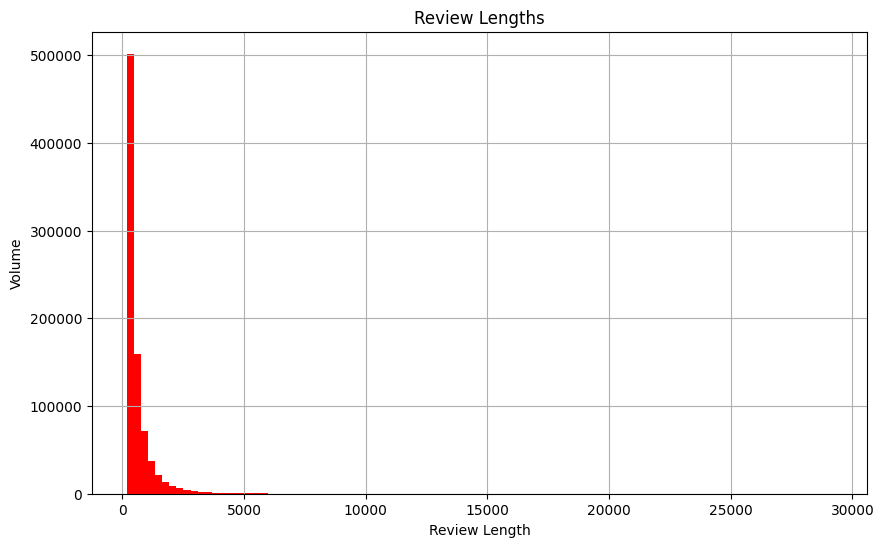

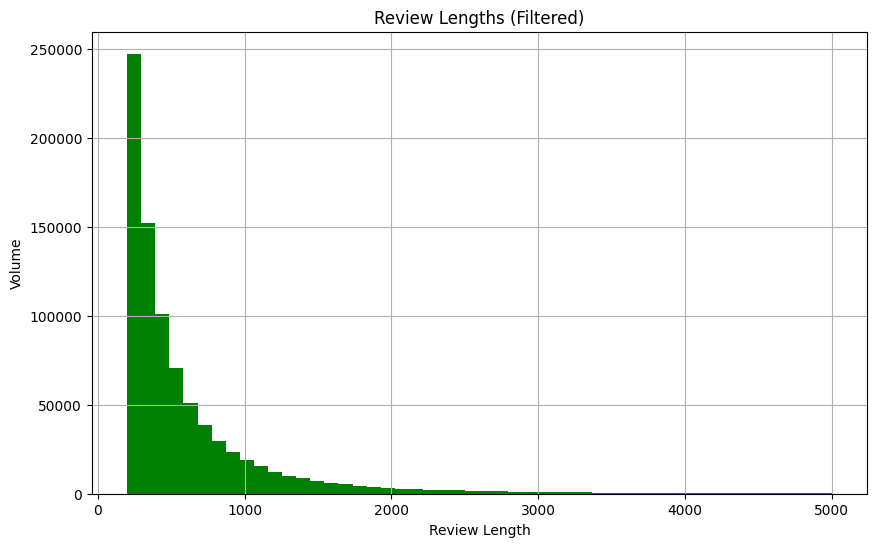

In [10]:

train['review_length'] = train['reviewText'].str.len()


plt.figure(figsize=(10,6))
train['review_length'].hist(bins=100, color='red')
plt.title('Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Volume')
plt.show()


filtered_train = train[(train['review_length'] > 15) & (train['review_length'] < 5000)]

plt.figure(figsize=(10,6))
filtered_train['review_length'].hist(bins=50, color='green')
plt.title('Review Lengths (Filtered)')
plt.xlabel('Review Length')
plt.ylabel('Volume')
plt.show()


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> 5.محصولاتی که بیشترین امتیاز ۵ را کسب کرده‌اند</div>


In [11]:
title_brand.head(5)

,asin,title,brand
0,0011300000,Genuine Geovision 1 Channel 3rd Party NVR IP S...,GeoVision
1,0043396828,"Books ""Handbook of Astronomical Image Processi...",33 Books Co.
2,0060009810,One Hot Summer,Visit Amazon's Carolina Garcia Aguilera Page
3,0060219602,Hurray for Hattie Rabbit: Story and pictures (...,Visit Amazon's Dick Gackenbach Page
4,0060786817,sex.lies.murder.fame.: A Novel,Visit Amazon's Lolita Files Page


In [12]:
train.head(5)

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,review_length
0,2,NaN,False,2016-11-11,A2OSUEZJIN7BI,0511189877,NaN,Chris,I have an older URC-WR7 remote and thought thi...,Cannot Learn,1478822400,561
1,5,NaN,True,2016-06-06,A2NETQRG6JHIG7,0511189877,NaN,Qrysta White,First time I've EVER had a remote that needed ...,zero programming needed! Miracle!?,1465171200,450
2,4,NaN,True,2016-03-10,A12JHGROAX49G7,0511189877,NaN,Linwood,Got them and only 2 of them worked. company ca...,Works Good and programs easy.,1457568000,205
3,5,NaN,True,2016-01-14,A1KV65E2TMMG6F,0511189877,NaN,Dane Williams,I got tired of the remote being on the wrong s...,Same as TWC remote,1452729600,284
4,5,NaN,True,2016-10-20,A280POPEWI0NSA,0594459451,NaN,Kristina H.,After purchasing cheap cords from another webs...,Good Quality Cord,1476921600,247


In [13]:
# merging train and and title_brand on asin to have one merged data
merged_df = train.merge(title_brand[['asin', 'title', 'brand']], on='asin', how='left')

merged_df.head()


,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,review_length,title,brand
0,2,NaN,False,2016-11-11,A2OSUEZJIN7BI,0511189877,NaN,Chris,I have an older URC-WR7 remote and thought thi...,Cannot Learn,1478822400,561,CLIKR-5 Time Warner Cable Remote Control UR5U-...,URC
1,5,NaN,True,2016-06-06,A2NETQRG6JHIG7,0511189877,NaN,Qrysta White,First time I've EVER had a remote that needed ...,zero programming needed! Miracle!?,1465171200,450,CLIKR-5 Time Warner Cable Remote Control UR5U-...,URC
2,4,NaN,True,2016-03-10,A12JHGROAX49G7,0511189877,NaN,Linwood,Got them and only 2 of them worked. company ca...,Works Good and programs easy.,1457568000,205,CLIKR-5 Time Warner Cable Remote Control UR5U-...,URC
3,5,NaN,True,2016-01-14,A1KV65E2TMMG6F,0511189877,NaN,Dane Williams,I got tired of the remote being on the wrong s...,Same as TWC remote,1452729600,284,CLIKR-5 Time Warner Cable Remote Control UR5U-...,URC
4,5,NaN,True,2016-10-20,A280POPEWI0NSA,0594459451,NaN,Kristina H.,After purchasing cheap cords from another webs...,Good Quality Cord,1476921600,247,Barnes &amp; Noble Nook Color Tablet USB Cable...,Barnes &amp; Noble


In [14]:
# defining five star reviews
five_stars = merged_df[merged_df['overall'] == 5]

# grouping by asin
best_products = five_stars.groupby('asin').size().reset_index(name='5star_count')

#sorting and getting top 10
best_products = best_products.sort_values(by='5star_count', ascending=False).head(10)
best_products = best_products.merge(merged_df[['asin', 'title', 'brand']].drop_duplicates(), on='asin', how='left')

best_products.head()


,asin,5star_count,title,brand
0,B010OYASRG,1163,OontZ Angle 3 Enhanced Stereo Edition IPX5 Spl...,Cambridge Soundworks
1,B00L0YLRUW,659,NETGEAR N300 WiFi Range Extender (EX2700),NETGEAR
2,B01DA0YCNC,600,Roku Streaming Stick (3600R) - HD Streaming Pl...,Roku
3,B000VS4HDM,598,StarTech USB 2.0 to SATA IDE Adapter (USB2SATA...,StarTech
4,B0043T7FXE,552,Logitech M570 Wireless Trackball Mouse &ndash;...,Logitech


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> 6.میانگین نظرات 10 برندی که بیشترین تعداد نظرات را داشتند</div>


In [23]:
#grouping by brand and counting each brands reviews
brand_review_counts = merged_df.groupby('brand').size().reset_index(name='review_count')

#sorting and getting top 10 brands
top10_brands = brand_review_counts.sort_values(by='review_count', ascending=False).head(10)

#finding brands' average ratings
brand_avg_rate = merged_df[merged_df['brand'].isin(top10_brands['brand'])].groupby('brand')['overall'].mean().reset_index(name='average_rate')

# merging to get all info in one df
top_10_avg = top10_brands.merge(brand_avg_rate, on='brand')

#sorting and getting top 10
top_10_avg = top_10_avg.sort_values(by='average_rate', ascending=False)
top10_reviewers=top10_reviewers.head(10)




In [24]:
#displaying results
top10_reviewers.reset_index(drop=True, inplace=True)
top_10_avg[['brand', 'average_rate']].head(10)

,brand,average_rate
5,Anker,4.244320
2,AmazonBasics,4.201468
8,Sabrent,4.028005
7,SanDisk,3.958810
0,Logitech,3.954061
1,Samsung,3.941268
3,Sony,3.938726
6,TP-LINK,3.928681
4,Asus,3.855550
9,NETGEAR,3.836274
